In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Q1) Read the dataset banks.csv

In [2]:
df = pd.read_csv('banks.csv')
df.head(3)

,Financial Institution Number,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Certificate Number,Transaction Type,Total Deposits,Total Assets,Estimated Loss
0,NaN,BANK OF AMERICA TRUST CO.,COMMERCIAL BANK,STATE,"PITTSBURGH, PA",4/19/1934,FDIC,NaN,PAYOUT,1064,1435.0,NaN
1,NaN,FON DU LAC STATE BANK,COMMERCIAL BANK,STATE,"EAST PEORIA, IL",5/28/1934,FDIC,NaN,PAYOUT,238,374.0,NaN
2,NaN,FIRST NATIONAL BANK OF LIMA,COMMERCIAL BANK,FEDERAL,"LIMA, MT",7/18/1934,FDIC,NaN,PAYOUT,42,91.0,NaN


In [3]:
df.columns

Index(['Financial Institution Number', 'Institution Name', 'Institution Type',
       'Charter Type', 'Headquarters', 'Failure Date', 'Insurance Fund',
       'Certificate Number', 'Transaction Type', 'Total Deposits',
       'Total Assets', 'Estimated Loss'],
      dtype='object')

In [4]:
df.shape

(3484, 12)

In [5]:
df.isnull().sum()

Financial Institution Number    601
Institution Name                  0
Institution Type                  0
Charter Type                      0
Headquarters                      0
Failure Date                      0
Insurance Fund                    0
Certificate Number              485
Transaction Type                  0
Total Deposits                    0
Total Assets                    151
Estimated Loss                  975
dtype: int64

In [6]:
df.dtypes

Financial Institution Number    float64
Institution Name                 object
Institution Type                 object
Charter Type                     object
Headquarters                     object
Failure Date                     object
Insurance Fund                   object
Certificate Number              float64
Transaction Type                 object
Total Deposits                    int64
Total Assets                    float64
Estimated Loss                  float64
dtype: object

#### Q2) Remove null values(if any). Replace column values with thier appropriate values. Drop columns if necessary

In [7]:
df.drop('Financial Institution Number',axis=1,inplace=True)
df.drop('Certificate Number',axis=1,inplace=True)
df.head()

,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Transaction Type,Total Deposits,Total Assets,Estimated Loss
0,BANK OF AMERICA TRUST CO.,COMMERCIAL BANK,STATE,"PITTSBURGH, PA",4/19/1934,FDIC,PAYOUT,1064,1435.0,NaN
1,FON DU LAC STATE BANK,COMMERCIAL BANK,STATE,"EAST PEORIA, IL",5/28/1934,FDIC,PAYOUT,238,374.0,NaN
2,FIRST NATIONAL BANK OF LIMA,COMMERCIAL BANK,FEDERAL,"LIMA, MT",7/18/1934,FDIC,PAYOUT,42,91.0,NaN
3,FLORENCE DEPOSIT BANK,COMMERCIAL BANK,STATE,"FLORENCE, IN",7/18/1934,FDIC,PAYOUT,69,105.0,NaN
4,BANK OF LEWISPORT,COMMERCIAL BANK,STATE,"LEWISPORT, KY",8/6/1934,FDIC,PAYOUT,68,81.0,NaN


In [8]:
df.isnull().sum()

Institution Name      0
Institution Type      0
Charter Type          0
Headquarters          0
Failure Date          0
Insurance Fund        0
Transaction Type      0
Total Deposits        0
Total Assets        151
Estimated Loss      975
dtype: int64

In [9]:
ta_mean = df['Total Assets'].mean()
df['Total Assets'].fillna(ta_mean,inplace=True)
df.isnull().sum()

Institution Name      0
Institution Type      0
Charter Type          0
Headquarters          0
Failure Date          0
Insurance Fund        0
Transaction Type      0
Total Deposits        0
Total Assets          0
Estimated Loss      975
dtype: int64

In [10]:
df['Estimated Loss'].fillna(0,inplace=True)
df.isnull().sum()

Institution Name    0
Institution Type    0
Charter Type        0
Headquarters        0
Failure Date        0
Insurance Fund      0
Transaction Type    0
Total Deposits      0
Total Assets        0
Estimated Loss      0
dtype: int64

In [11]:
# df['Failure Year']

## EDA

#### Q3) Depict institution type on a bar chart and a countplot

In [12]:
d1 = df['Institution Type'].value_counts()
d1

COMMERCIAL BANK        2465
SAVINGS ASSOCIATION     691
SAVINGS BANK            328
Name: Institution Type, dtype: int64

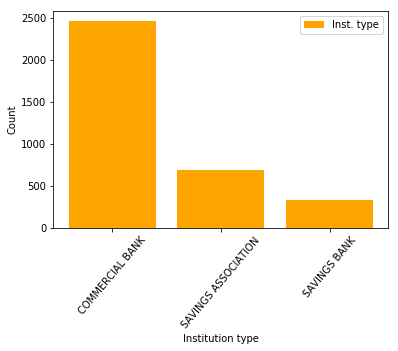

In [13]:
plt.bar(d1.index,d1,label='Inst. type',color='orange')
plt.legend()
plt.xlabel('Institution type')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

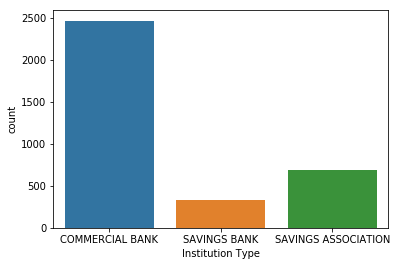

In [14]:
sns.countplot(df['Institution Type'])
plt.show()

#### Q4) Depict 'Charter Type' on a bar chart and a countplot

In [15]:
d2 = df['Charter Type'].value_counts()
d2

STATE            2033
FEDERAL           760
FEDERAL/STATE     691
Name: Charter Type, dtype: int64

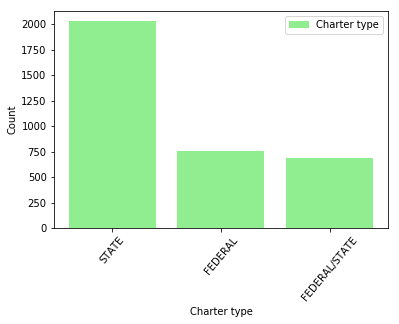

In [16]:
plt.bar(d2.index,d2,label='Charter type',color='lightgreen')
plt.legend()
plt.xlabel('Charter type')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

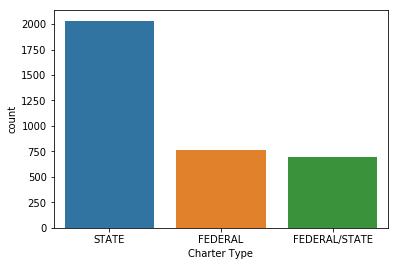

In [17]:
sns.countplot(df['Charter Type'])
plt.show()

#### Q5) Depict 'Transaction Type' on a line chart superimposed with bar chart and a countplot separately

In [18]:
d3 = df['Transaction Type'].value_counts()
d3

ACQUISITION      2462
PAYOUT            581
TRANSFER          402
MANAGEMENT         37
PRIVATIZATION       2
Name: Transaction Type, dtype: int64

E:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
E:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
E:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


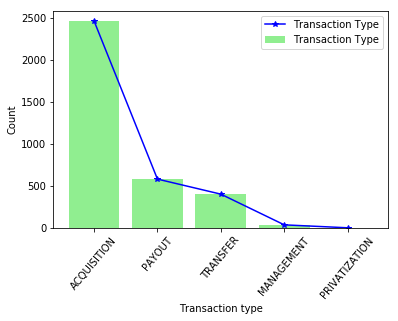

In [19]:
plt.plot(d3.index,d3,label='Transaction Type',color='blue',marker="*")
plt.bar(d3.index,d3,label='Transaction Type',color='lightgreen')
plt.legend()
plt.xlabel('Transaction type')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

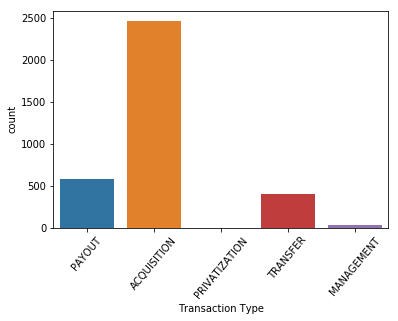

In [20]:
sns.countplot(df['Transaction Type'])
plt.xticks(rotation=50)
plt.show()

#### Q6) Depict count of 'Insurance Fund' on a pie chart 

In [21]:
d4 = df['Insurance Fund'].value_counts()
d4

FDIC     1502
RTC       746
BIF       576
DIF       521
FSLIC     133
SAIF        6
Name: Insurance Fund, dtype: int64

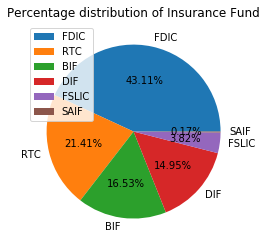

In [22]:
plt.pie(x=d4,labels=d4.index,autopct="%.2f%%")
plt.legend(loc=2)
plt.title('Percentage distribution of Insurance Fund')
# plt.xticks(rotation=50)
plt.show()

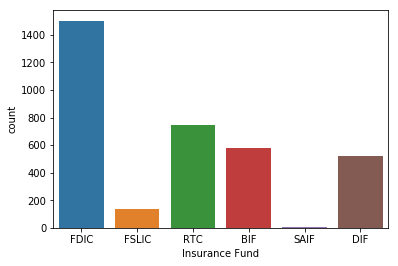

In [23]:
sns.countplot(df['Insurance Fund'])
# plt.xticks(rotation=50)
plt.show()

In [24]:
df.head(3)

,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Transaction Type,Total Deposits,Total Assets,Estimated Loss
0,BANK OF AMERICA TRUST CO.,COMMERCIAL BANK,STATE,"PITTSBURGH, PA",4/19/1934,FDIC,PAYOUT,1064,1435.0,0.0
1,FON DU LAC STATE BANK,COMMERCIAL BANK,STATE,"EAST PEORIA, IL",5/28/1934,FDIC,PAYOUT,238,374.0,0.0
2,FIRST NATIONAL BANK OF LIMA,COMMERCIAL BANK,FEDERAL,"LIMA, MT",7/18/1934,FDIC,PAYOUT,42,91.0,0.0


#### 7) Depict sum of Total Assets based on Charter Type on a bar chart

In [25]:
df['Total Assets'].unique()

array([1.43500e+03, 3.74000e+02, 9.10000e+01, ..., 6.63360e+04,
       1.26430e+05, 3.61197e+05])

In [26]:
df1 = df.groupby('Charter Type')['Total Assets'].sum()
df1
# plt.hist(df['Total Assets'])
# plt.show()

Charter Type
FEDERAL          2.077612e+08
FEDERAL/STATE    3.113549e+08
STATE            8.904700e+08
Name: Total Assets, dtype: float64

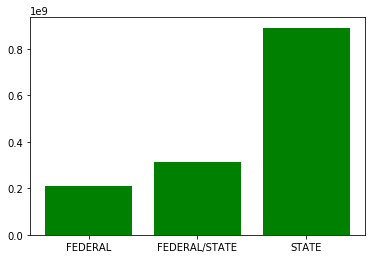

In [27]:
plt.bar(df1.index,df1,color='green')
plt.show()

#### 8) Depict mean of Total Deposit based on Transaction Type on a bar chart superimposed on a line chart

In [28]:
# sns.violinplot(x=df['Total Assets'], hue=df['Insurance Fund'])
df2 = df.groupby('Transaction Type')['Total Deposits'].mean()
df2
# plt.hist(df['Total Assets'])
# plt.show()

Transaction Type
ACQUISITION      3.741363e+05
MANAGEMENT       3.949903e+05
PAYOUT           7.766675e+04
PRIVATIZATION    1.825393e+06
TRANSFER         1.490218e+05
Name: Total Deposits, dtype: float64

E:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
E:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
E:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


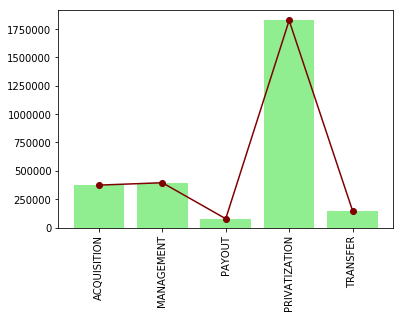

In [29]:
plt.bar(df2.index,df2,color='lightgreen')
plt.plot(df2.index,df2,color='maroon',marker='o')
plt.xticks(rotation=90)
plt.show()

#### 9) Depict mean of Total Deposit and Total Assets based on Charter Type on a bar chart, stacked bar chart and a line chart

In [30]:
df3 = df.groupby('Charter Type')['Total Deposits','Total Assets'].mean()
df3

E:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Total Deposits,Total Assets
Charter Type,,
FEDERAL,203592.725000,273369.942671
FEDERAL/STATE,374481.780029,450585.943560
STATE,310340.787998,438007.850849


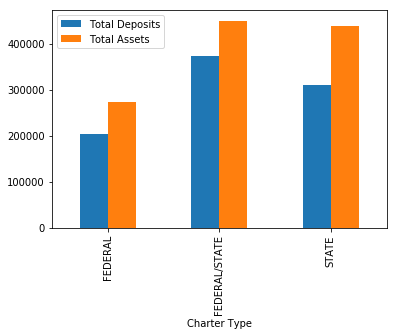

In [31]:
df3.plot(kind='bar')
plt.show()

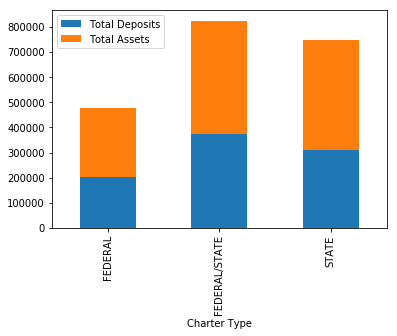

In [32]:
df3.plot(kind='bar',stacked=True)
plt.show()

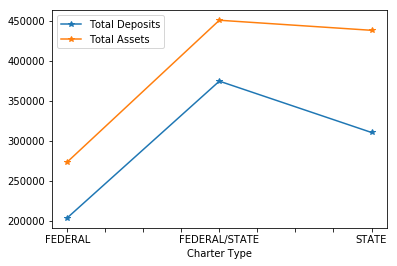

In [33]:
df3.plot(kind='line',marker='*')
plt.xlabel('Charter Type')
plt.show()

#### 10) Derive the columns - Fail_year, Fail_month, Fail_Day based on Failure date field

In [34]:
df.dtypes

Institution Name     object
Institution Type     object
Charter Type         object
Headquarters         object
Failure Date         object
Insurance Fund       object
Transaction Type     object
Total Deposits        int64
Total Assets        float64
Estimated Loss      float64
dtype: object

In [35]:
df['Failure Date'] = pd.to_datetime(df['Failure Date'])
df.dtypes

Institution Name            object
Institution Type            object
Charter Type                object
Headquarters                object
Failure Date        datetime64[ns]
Insurance Fund              object
Transaction Type            object
Total Deposits               int64
Total Assets               float64
Estimated Loss             float64
dtype: object

In [36]:
df['Fail_Year'] = df['Failure Date'].dt.year
df['Fail_Month'] = df['Failure Date'].dt.month
df['Fail_Day'] = df['Failure Date'].dt.day
df.head(3)

,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Transaction Type,Total Deposits,Total Assets,Estimated Loss,Fail_Year,Fail_Month,Fail_Day
0,BANK OF AMERICA TRUST CO.,COMMERCIAL BANK,STATE,"PITTSBURGH, PA",1934-04-19,FDIC,PAYOUT,1064,1435.0,0.0,1934,4,19
1,FON DU LAC STATE BANK,COMMERCIAL BANK,STATE,"EAST PEORIA, IL",1934-05-28,FDIC,PAYOUT,238,374.0,0.0,1934,5,28
2,FIRST NATIONAL BANK OF LIMA,COMMERCIAL BANK,FEDERAL,"LIMA, MT",1934-07-18,FDIC,PAYOUT,42,91.0,0.0,1934,7,18


In [37]:
df['Fail_Year'].unique()

array([1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017], dtype=int64)

In [38]:
df.isnull().sum()

Institution Name    0
Institution Type    0
Charter Type        0
Headquarters        0
Failure Date        0
Insurance Fund      0
Transaction Type    0
Total Deposits      0
Total Assets        0
Estimated Loss      0
Fail_Year           0
Fail_Month          0
Fail_Day            0
dtype: int64

#### 11) Depict Fail_Month wise mean of Total Deposits and Total Assets on a bar chart, line chart  and a scatter chart

In [39]:
df4 = df.groupby('Fail_Month')['Total Deposits','Total Assets'].mean()
df4

E:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Total Deposits,Total Assets
Fail_Month,,
1,3.557187e+05,4.328379e+05
2,3.135955e+05,4.153757e+05
3,2.010547e+05,2.502661e+05
4,2.088279e+05,2.719802e+05
5,2.000744e+05,2.601945e+05
6,1.492130e+05,1.970686e+05
7,2.784386e+05,3.829203e+05
8,2.919581e+05,3.520760e+05
9,1.087839e+06,1.673873e+06


In [40]:
month = ['Jan', 'Feb','Mar','Apr',"May",'Jun','Jul','Aug','Spet','Oct','Nov','Dec']


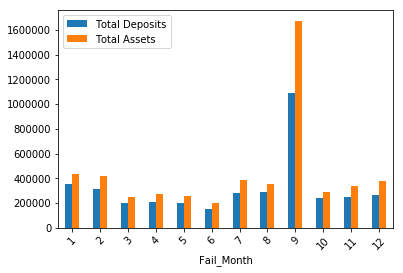

In [41]:
df4.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

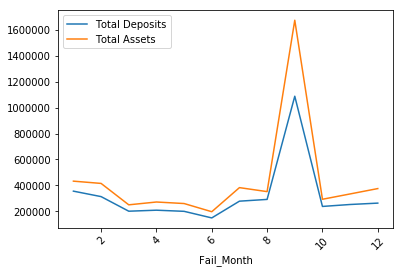

In [43]:
df4.plot(kind='line')
plt.xticks(rotation=45)
plt.show()

In [43]:
# df4.plot(kind='area',marker='*')
# plt.xticks(rotation=45)
# plt.show()

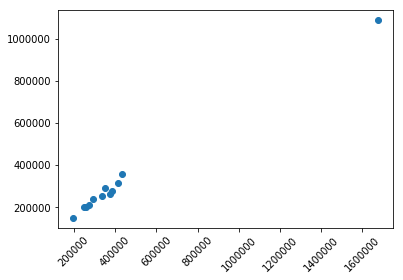

In [44]:
plt.scatter(df4['Total Assets'],df4['Total Deposits'])
plt.xticks(rotation=45)
plt.show()

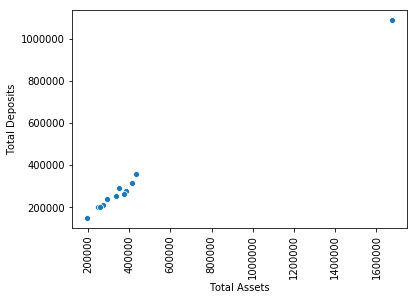

In [45]:
sns.scatterplot(data=df4, x= 'Total Assets',y='Total Deposits')
plt.xticks(rotation=90)
plt.show()

#### 12) Depict Fail_Year wise sum of Estimated Loss on a horizontal bar chart

In [46]:
df5 = df.groupby('Fail_Year')['Estimated Loss'].sum()
df5

Fail_Year
1934          0.0
1935          0.0
1936          0.0
1937          0.0
1938          0.0
          ...    
2013    1315083.0
2014     407660.0
2015     159259.0
2016          0.0
2017          0.0
Name: Estimated Loss, Length: 82, dtype: float64

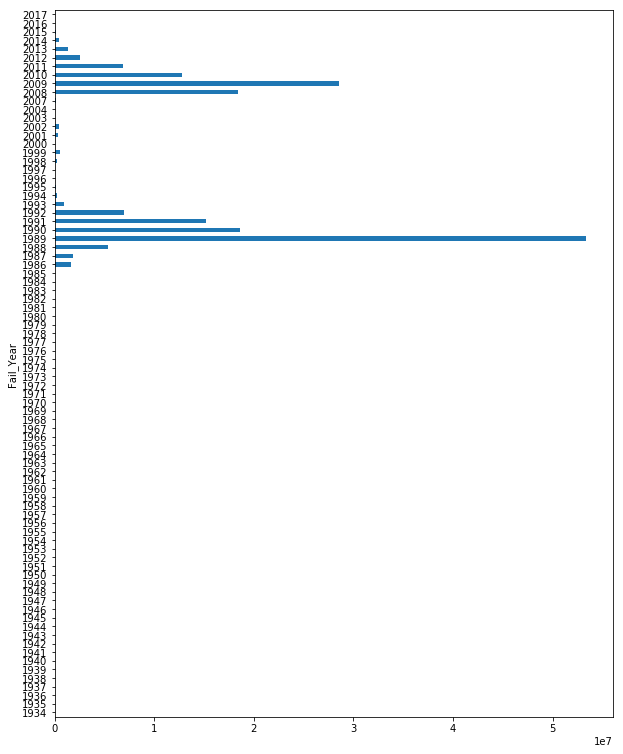

In [47]:
df5.plot(kind='barh',figsize=(10,13))
plt.show()

#### 13) Derive a column - Fail_Quarter based on Failure Date

In [48]:
df['Fail_Quarter'] = df['Failure Date'].dt.quarter
df.head(2)

,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Transaction Type,Total Deposits,Total Assets,Estimated Loss,Fail_Year,Fail_Month,Fail_Day,Fail_Quarter
0,BANK OF AMERICA TRUST CO.,COMMERCIAL BANK,STATE,"PITTSBURGH, PA",1934-04-19,FDIC,PAYOUT,1064,1435.0,0.0,1934,4,19,2
1,FON DU LAC STATE BANK,COMMERCIAL BANK,STATE,"EAST PEORIA, IL",1934-05-28,FDIC,PAYOUT,238,374.0,0.0,1934,5,28,2


#### 14) Find Fail_Quarter wise mean of Total Assets where Transaction type is 'PAYOUT'. Depict the result on a bar and a line chart superimposed

In [53]:
df6 = df[df['Transaction Type']=='PAYOUT']
df6.shape

(581, 14)

In [55]:
df7 = df6.groupby('Fail_Quarter')['Total Assets'].sum()
df7

Fail_Quarter
1    20448239.0
2    13468529.0
3     6390738.0
4     7373945.0
Name: Total Assets, dtype: float64

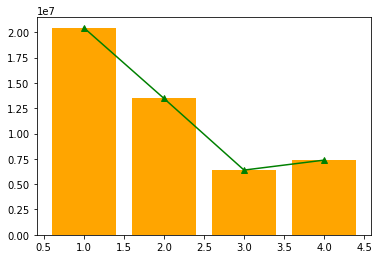

In [56]:
plt.bar(df7.index,df7,color='orange')
plt.plot(df7.index,df7,color='green',marker='^')
plt.show()

#### 15) Find max of Total Assets and Total Deposits based on Fail Month where Charter Type is State and Institution Type is Commercial Bank. Depict the result on a bar chart, stacked bar chart and line chart separately

In [49]:
df['Charter Type'].value_counts()

STATE            2033
FEDERAL           760
FEDERAL/STATE     691
Name: Charter Type, dtype: int64

In [57]:
df['Institution Type'].value_counts()

COMMERCIAL BANK        2465
SAVINGS ASSOCIATION     691
SAVINGS BANK            328
Name: Institution Type, dtype: int64

In [58]:
df8 = df[(df['Charter Type']=='STATE') & (df['Institution Type']=='COMMERCIAL BANK')]
df8.shape

(1705, 14)

In [59]:
df9 = df.groupby('Fail_Month')['Total Assets','Total Deposits'].max()
df9

E:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Total Assets,Total Deposits
Fail_Month,,
1,13428614.0,9406853
2,9581584.0,6615722
3,13382327.0,7575392
4,6038921.0,4265330
5,13111463.0,8775985
6,5654683.0,4130994
7,30698512.0,18941727
8,25455112.0,20072099
9,307021614.0,188260793


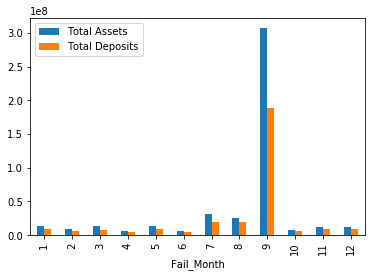

In [60]:
df9.plot(kind='bar')
plt.show()

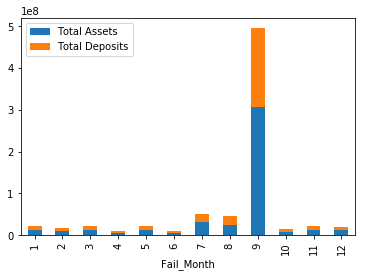

In [61]:
df9.plot(kind='bar',stacked=True)
plt.show()

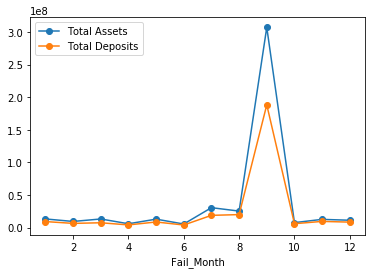

In [62]:
df9.plot(kind='line',marker='o')
plt.show()

#### 16) For the Q15, Figure out a way to depict Month Names instead of numbers on the x-axis depicting the same charts as above 

In [63]:
df9['Fail Month'] = df9.index
df9

,Total Assets,Total Deposits,Fail Month
Fail_Month,,,
1,13428614.0,9406853,1
2,9581584.0,6615722,2
3,13382327.0,7575392,3
4,6038921.0,4265330,4
5,13111463.0,8775985,5
6,5654683.0,4130994,6
7,30698512.0,18941727,7
8,25455112.0,20072099,8
9,307021614.0,188260793,9


In [64]:
df9['Fail Month'] = df9['Fail Month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
                       7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df9

,Total Assets,Total Deposits,Fail Month
Fail_Month,,,
1,13428614.0,9406853,Jan
2,9581584.0,6615722,Feb
3,13382327.0,7575392,Mar
4,6038921.0,4265330,Apr
5,13111463.0,8775985,May
6,5654683.0,4130994,Jun
7,30698512.0,18941727,Jul
8,25455112.0,20072099,Aug
9,307021614.0,188260793,Sep


In [65]:
df10 = df9.set_index('Fail Month')
df10.head()

,Total Assets,Total Deposits
Fail Month,,
Jan,13428614.0,9406853
Feb,9581584.0,6615722
Mar,13382327.0,7575392
Apr,6038921.0,4265330
May,13111463.0,8775985


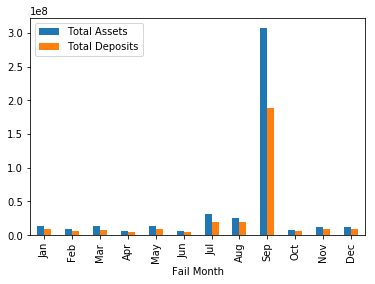

In [66]:
df10.plot(kind='bar')
plt.show()

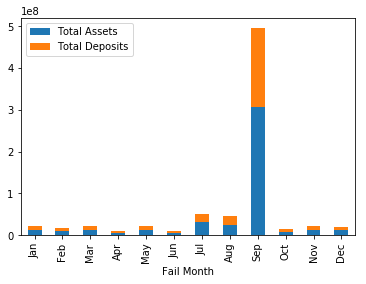

In [67]:
df10.plot(kind='bar',stacked=True)
plt.show()

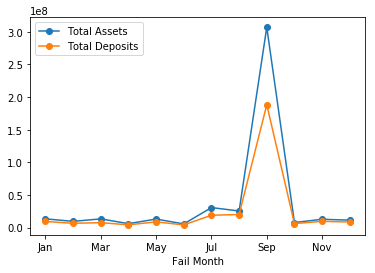

In [68]:
df10.plot(kind='line',marker="o")
plt.show()

In [70]:
# sns.barplot(data=df9,x='Total Assets',y='Total Deposits',hue='Fail Month')

#### Q17) Find min of Total Assets and mean of Estimated Loss based on Quarter and Insurance Fund where Total Deposits is over 50000 and Institution Type is Savings Bank. Depict the result on a bar chart and stacked bar chart separately

In [95]:
print(df['Institution Type'].unique())

['COMMERCIAL BANK' 'SAVINGS BANK' 'SAVINGS ASSOCIATION']


In [98]:
df[df['Total Deposits']==df['Total Deposits'].max()]

,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Transaction Type,Total Deposits,Total Assets,Estimated Loss,Fail_Year,Fail_Month,Fail_Day,Fail_Quarter
2978,WASHINGTON MUTUAL BANK,SAVINGS BANK,STATE,"HENDERSON, NV",2008-09-25,DIF,ACQUISITION,188260793,307021614.0,0.0,2008,9,25,3


In [99]:
da1 = df[(df['Total Deposits']>50000) & (df['Institution Type']=='SAVINGS BANK')]
da1.shape

(256, 14)

In [101]:
da2 = da1.groupby(['Fail_Quarter','Insurance Fund'])['Total Assets',
    'Estimated Loss'].agg({'Total Assets':min, 'Estimated Loss':np.mean})
da2

E:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Total Assets  Estimated Loss
Fail_Quarter Insurance Fund                              
1            BIF                  83699.0   181692.625000
             DIF                  88031.0   141051.142857
             FDIC                880658.0   288210.000000
             FSLIC                76623.0     8357.500000
             RTC                  61213.0   118194.580000
2            BIF                 223665.0   168884.666667
             DIF                 166456.0   739775.000000
             FSLIC                89114.0        0.000000
             RTC                  43367.0    58924.488372
3            BIF                  65213.0    85796.454545
             DIF                  64344.0   703467.631579
             FSLIC               206490.0        0.000000
             RTC                  61158.0   121766.423077
             SAIF                 68981.0   143934.000000
4            BIF                 103814.0   102896.111111
             DIF                  65498.0   412569.083333
             FDIC                525481.0    63568.000000
             FSLIC                63780.0        0.000000
             RTC                  50912.0   150097.172414

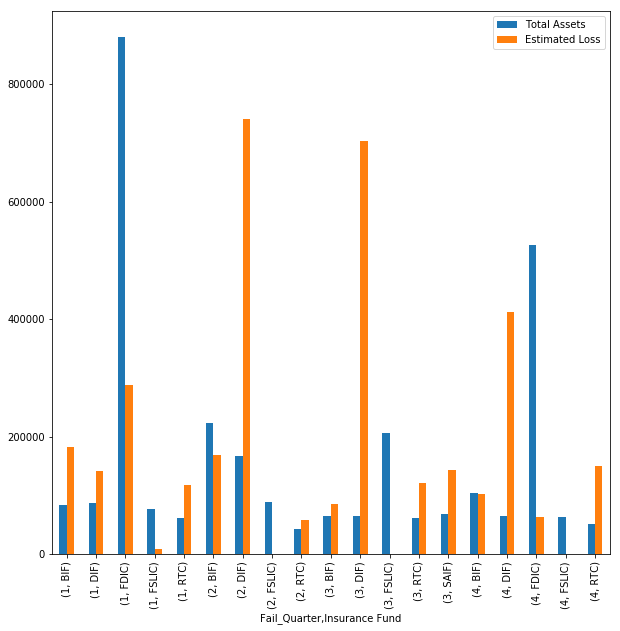

In [107]:
# plt.figure(figsize=(8,8))
da2.plot(kind='bar',figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

<Figure size 576x576 with 0 Axes>

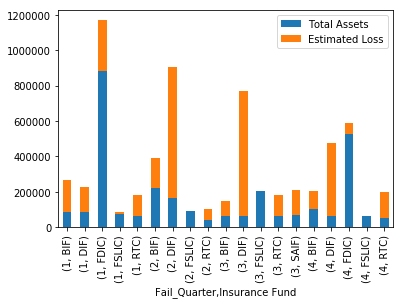

In [105]:
plt.figure(figsize=(8,8))
da2.plot(kind='bar',stacked=True)
plt.xticks(rotation=90)
plt.show()

#### Q18) Find min of Total Deposits and max of Estimated Loss based on Charter Type and Fail Year where Fail_Year> 2010 and Institution Name is not First State Bank .Depict the result on a stacked bar chart( unstacking is not required)


In [80]:
df.sample()

,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Transaction Type,Total Deposits,Total Assets,Estimated Loss,Fail_Year,Fail_Month,Fail_Day,Fail_Quarter
1397,"FIRST REPUBLICBANK-HARLINGEN, N.A.",COMMERCIAL BANK,FEDERAL,"HARLINGEN, TX",1988-07-29,FDIC,ACQUISITION,193137,213556.0,47337.0,1988,7,29,3


In [81]:
df['Institution Name'].value_counts()

FIRST STATE BANK           37
THE FIRST STATE BANK       18
FARMERS STATE BANK         16
CITIZENS STATE BANK        10
FIRST FED. S & L ASSOC.     9
                           ..
ALASKA CONTINENTAL BANK     1
SUPERIOR FSA                1
EMPIRE SAVINGS BANK         1
TONEY BROTHERS BANK         1
FIRSTIER BANK               1
Name: Institution Name, Length: 3185, dtype: int64

In [110]:
da3 = df[(df['Institution Name']!='FIRST STATE BANK') & (df['Fail_Year']>2010)]
da3.shape

(198, 14)

In [111]:
da4 = da3.groupby(['Charter Type','Fail_Year'])['Total Deposits','Estimated Loss'].agg({'Total Deposits':min,'Estimated Loss':max})
da4

E:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Total Deposits  Estimated Loss
Charter Type  Fail_Year                                
FEDERAL       2011                20980        113222.0
              2012                45149         33403.0
              2013               142640        684468.0
              2014                51878         55588.0
              2015                 3705          5971.0
FEDERAL/STATE 2011               123950        323395.0
              2012                17548         88796.0
              2013                87196          8692.0
              2014                68722         19768.0
STATE         2011                30542        279845.0
              2012                21809        357575.0
              2013                19579        136481.0
              2014                18221        102957.0
              2015                25480        101770.0
              2016                20148             0.0
              2017               123817             0.0

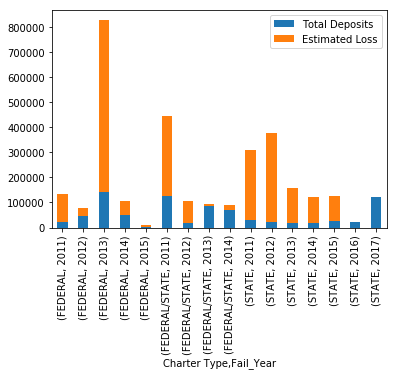

In [84]:
da4.plot(kind='bar',stacked=True)
plt.xticks(rotation=90)
plt.show()

In [85]:
# da4.unstack(level=0).plot(kind='bar',stacked=True)
# plt.xticks(rotation=90)
# plt.show()

#### 19) Between the dates 1st Jan 2010 and 31st Dec 2015, find the mean of Total Deposits and Total Assets based on Charter Type and InstitutionType.Depict the result on a stacked bar chart(unstacking is not required)

In [88]:
df['Failure Date'].unique()

array(['1934-04-19T00:00:00.000000000', '1934-05-28T00:00:00.000000000',
       '1934-07-18T00:00:00.000000000', ...,
       '2016-09-23T00:00:00.000000000', '2017-01-13T00:00:00.000000000',
       '2017-01-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [92]:
da5 = df[df["Failure Date"].between('2010-01-01','2015-12-31')]
da5.shape

(346, 14)

In [93]:
da6 = da5.groupby(['Charter Type','Institution Type'])['Total Assets','Total Deposits'].mean()
da6

E:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Total Assets  Total Deposits
Charter Type  Institution Type                                  
FEDERAL       COMMERCIAL BANK      466781.021277   420667.000000
FEDERAL/STATE SAVINGS ASSOCIATION  479816.227273   404681.090909
STATE         COMMERCIAL BANK      329685.208000   300305.060000
              SAVINGS BANK         538621.555556   432025.740741

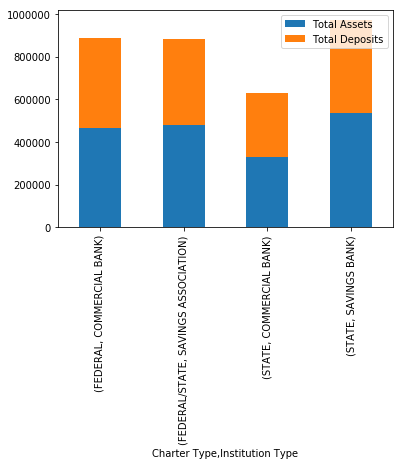

In [117]:
da6.plot(kind='bar',stacked='bar')
plt.xticks(rotation=90)
plt.show()

#### 20) Depict Charter Type based on Fail Quarter on a countplot

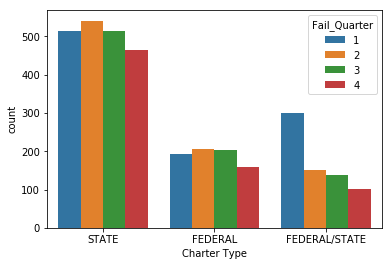

In [118]:
sns.countplot('Charter Type', data=df, hue='Fail_Quarter')
plt.show()

#### 21) Depict Total Assets vs Total Deposits on a joint plot with scatter kind where Fail Year>=2012 and Institution Type is  Savings Association 

In [112]:
df_r2 = df[(df['Fail_Year']>=2012) | (df['Institution Type']=='SAVINGS ASSOCIATION')]
df_r2.shape

(785, 14)

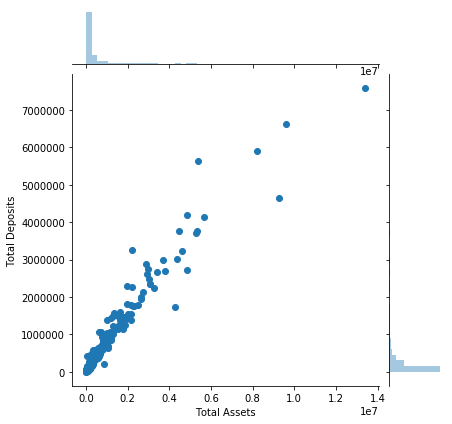

In [116]:
sns.jointplot('Total Assets','Total Deposits',data=df_r2)
plt.show()